# Fourier point source

In [1]:
%load_ext autoreload
%autoreload 2
import site
import sys
site.addsitedir('..')

In [2]:
import numpy as np
import jax.numpy as jnp
from  matplotlib import pyplot as plt
from src.utils import *
from src.projection import project, rotate
from src.interpolate import *

## Important: in Fourier domain, the point is rotated in the fftshifted coordinates (i.e. 0 in the centre) - working now

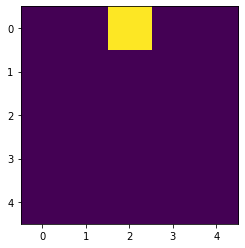

In [3]:
nx = 5
dx = 0.2

v = np.zeros([nx,nx,nx])
v[0,2,2] = 1
#v[1,1,0] = 1
v = jnp.array(v)

plt.imshow(v[:,:,2])

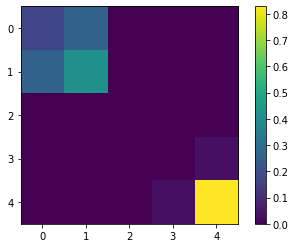

In [13]:
x_freq = jnp.fft.fftfreq(nx, dx)
y_freq = jnp.fft.fftfreq(nx, dx)
z_freq = jnp.fft.fftfreq(nx, dx)

x_grid = jnp.array([x_freq[1], len(x_freq)])
y_grid = jnp.array([y_freq[1], len(y_freq)])
z_grid = jnp.array([z_freq[1], len(z_freq)])


X, Y, Z = jnp.meshgrid(x_freq, y_freq, z_freq, indexing = 'xy')

angles = jnp.array([0,0,jnp.pi/4])

vr, _ = project(jnp.fft.ifftshift(v), x_grid, y_grid, z_grid, angles, "tri")
vr = vr.reshape(v.shape[0], v.shape[1])
plt.imshow(jnp.fft.fftshift(vr))
plt.colorbar()

### Do the steps in project

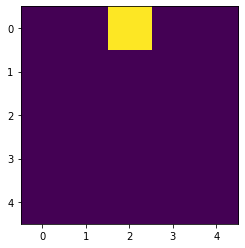

In [14]:
nx = 5
dx = 0.2

v = np.zeros([nx,nx,nx])
v[0,2,2] = 1

v = jnp.array(v)

plt.imshow(v[:,:,2])

In [6]:
angles = jnp.array([0,0,jnp.pi/4])
slice_coords = rotate(x_grid, y_grid, angles)

#slice_coords = jnp.array([slice_coords[1],slice_coords[0], slice_coords[2]])



In [127]:
slice_interp = interpolate(slice_coords, x_grid, y_grid, z_grid, jnp.fft.ifftshift(v), "nn")
slice_interp_2d = jnp.fft.fftshift(slice_interp.reshape(v.shape[0], v.shape[1]))

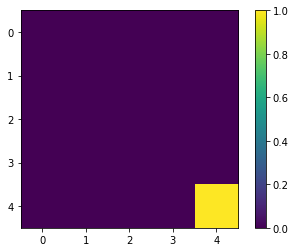

In [128]:
plt.imshow(slice_interp_2d); plt.colorbar()

In [99]:
print(slice_coords[0].reshape(v.shape[0], v.shape[1]))

[[ 0.          0.70710677  1.4142135  -1.4142135  -0.70710677]
 [-0.70710677  0.          0.70710677 -2.1213202  -1.4142135 ]
 [-1.4142135  -0.70710677  0.         -2.828427   -2.1213202 ]
 [ 1.4142135   2.1213202   2.828427    0.          0.70710677]
 [ 0.70710677  1.4142135   2.1213202  -0.70710677  0.        ]]


In [100]:
print(slice_coords[1].reshape(v.shape[0], v.shape[1]))

[[ 0.          0.70710677  1.4142135  -1.4142135  -0.70710677]
 [ 0.70710677  1.4142135   2.1213202  -0.70710677  0.        ]
 [ 1.4142135   2.1213202   2.828427    0.          0.70710677]
 [-1.4142135  -0.70710677  0.         -2.828427   -2.1213202 ]
 [-0.70710677  0.          0.70710677 -2.1213202  -1.4142135 ]]


In [101]:
X[:,:,0]

DeviceArray([[ 0.,  1.,  2., -2., -1.],
             [ 0.,  1.,  2., -2., -1.],
             [ 0.,  1.,  2., -2., -1.],
             [ 0.,  1.,  2., -2., -1.],
             [ 0.,  1.,  2., -2., -1.]], dtype=float32)